<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20250117%5D%20MLP(Standalone)%20on%20UNSW-NB15_30%20Epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MLP (Standalone) based on UNSW-NB15 dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Flatten
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.utils import to_categorical

In [ ]:
#Load dataset
dataset = pd.read_csv("Dataset_10Classes.csv")
# Preprocessing: Handle missing values (if any)
dataset = dataset.dropna() # Remove missing values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 47 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID_Cb              257673 non-null  int64  
 1   id                 257673 non-null  int64  
 2   dur                257673 non-null  float64
 3   proto              257673 non-null  object 
 4   service            257673 non-null  object 
 5   state              257673 non-null  object 
 6   spkts              257673 non-null  int64  
 7   dpkts              257673 non-null  int64  
 8   sbytes             257673 non-null  int64  
 9   dbytes             257673 non-null  int64  
 10  rate               257673 non-null  float64
 11  sttl               257673 non-null  int64  
 12  dttl               257673 non-null  int64  
 13  sload              257673 non-null  float64
 14  dload              257673 non-null  float64
 15  sloss              257673 non-null  int64  
 16  dl

In [ ]:
dataset["Class"].unique()

array([0, 2, 1, 5, 8, 7, 4, 3, 9, 6])

In [ ]:
# Encode non-numeric columns (if any)
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Identify categorical columns
        dataset[column] = LabelEncoder().fit_transform(dataset[column])

# Separate features (X) and target (y)
X = dataset.drop(['Class'], axis=1)  # Assuming 'Class' is the target column
y = dataset['Class']
print("Original Class Distribution:", np.bincount(y))

Original Class Distribution: [93000  2677  2329 16353 44525 24246 58871 13987  1511   174]


In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.13.0


**Data Balancing utilized SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Verify the balanced dataset distribution
print("Balanced Class Distribution:", np.bincount(y))

Balanced Class Distribution: [93000 93000 93000 93000 93000 93000 93000 93000 93000 93000]


**Split data into 80% Training and 20% Testing**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

**Random Forest (RF) for 10 class classifications**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

In [ ]:
# Compute TP, TN, FP, FN for each class
#cm = confusion_matrix(np.argmax(y_test, axis=1), test_rf_features)
cm = confusion_matrix(y_test, y_test_prediction)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for each class
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)

# Print FPR and TPR for each class
for i in range(10):
    print(f"Class {i} - FPR: {FPR[i]}, TPR: {TPR[i]}")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(8,6.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='gist_earth')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])

  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees

  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

In [ ]:
print("Confusion Matrix of Random Forest")
conf_mat(y_test, y_test_prediction)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1)

In [ ]:
performance("Random Forest",y_test, y_test_prediction)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Compute the predicted probabilities
y_test_probabilities = rf.predict_proba(X_test)

# Compute the AUC
auc = roc_auc_score(y_test, y_test_probabilities, multi_class='ovr')
print("AUC: {:.2f}".format(auc))

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probabilities[:, 1], pos_label=1)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Compute the AUC and ROC curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = len(np.unique(y_test))
y_test_encoded = LabelEncoder().fit_transform(y_test)

y_scores = rf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_scores[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**MLP for 10 class classifications based on UNSW-NB15 dataset**

In [ ]:
#import pandas as pd
#import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.layers import Dense, Dropout

In [ ]:
#Convert the target variables to categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the MLP model
def build_mlp_model(input_shape, num_classes):
    model = Sequential()

    # Input Layer
    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(0.3))  # Dropout for regularization

    # Hidden Layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Prepare the input shape and number of classes
input_shape = X_train.shape[1]  # Number of features
num_classes = y_train.shape[1]  # Number of output classes

# Build the model
model = build_mlp_model(input_shape, num_classes)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate the model
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

# Make predictions with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Convert categorical target variables back to class labels
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_true, predicted_classes)
print("Classification Report:")
print(cr)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8781 - loss: 0.3311 - val_accuracy: 0.9994 - val_loss: 0.0022
Epoch 2/30
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9905 - loss: 0.0343 - val_accuracy: 0.9994 - val_loss: 0.0016
Epoch 3/30
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9930 - loss: 0.0266 - val_accuracy: 0.9992 - val_loss: 0.0029
Epoch 4/30
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9945 - loss: 0.0206 - val_accuracy: 0.9992 - val_loss: 0.0023
Epoch 5/30
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9953 - loss: 0.0193 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 6/30
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9957 - loss: 0.0158 - val_accuracy: 0.9994 - val_loss: 0.0017
Epoch 7/30
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9962 - loss: 0.0164 - val_accuracy: 0.9993 - val_loss: 0.0021
Epoch 8/30
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate predictions
y_pred_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class predictions
y_true_classes = np.argmax(y_test, axis=1)       # Convert one-hot encoded labels to class indices

# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print the metrics with 10 decimals
print("Model Performance Metrics:")
print("Accuracy: {:.10f}".format(accuracy))
print("Precision: {:.10f}".format(precision))
print("Recall: {:.10f}".format(recall))
print("F1-Score: {:.10f}".format(f1))

Model Performance Metrics:
Accuracy: 0.9993655914
Precision: 0.9993686515
Recall: 0.9993655914
F1-Score: 0.9993658100


Confusion Matrix of MLP


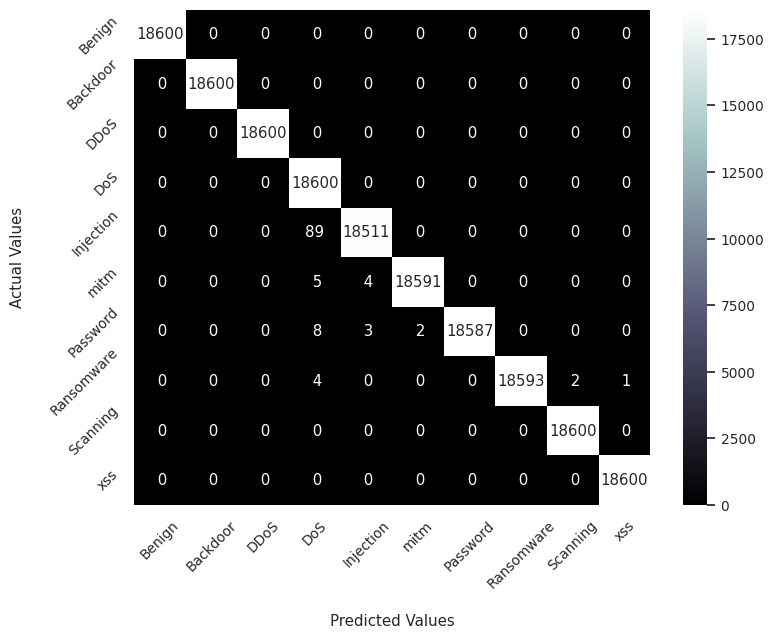

In [ ]:
import seaborn as sns

def conf_mat(d1, d2):
    cm = confusion_matrix(d1, d2)
    plt.figure(figsize=(8, 6.5))
    ax = sns.heatmap(cm, fmt='2', annot=True, cmap='bone')
    sns.set(font_scale=0.85)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values\n')
    ax.xaxis.set_ticklabels(
        ['Benign','Backdoor','DDoS','DoS','Injection','mitm','Password','Ransomware','Scanning','xss'])
    ax.yaxis.set_ticklabels(
        ['Benign','Backdoor','DDoS','DoS','Injection','mitm','Password','Ransomware','Scanning','xss'])

    plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
    plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees

    plt.tight_layout()
    # plt.savefig("F1.eps", format = 'eps')
    plt.show()

print("Confusion Matrix of MLP")
conf_mat(y_true, predicted_classes) #Calling the function after its definition

In [ ]:
# Compute TP, TN, FP, FN for each class
#cm = confusion_matrix(np.argmax(y_test, axis=1), test_rf_features)
#cm = confusion_matrix(y_test, y_test_prediction)
cm = confusion_matrix(y_true, predicted_classes)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for each class
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)

# Print FPR and TPR for each class
for i in range(10):
    print(f"Class {i} - FPR: {FPR[i]}, TPR: {TPR[i]}")

Class 0 - FPR: 0.0, TPR: 1.0
Class 1 - FPR: 0.0, TPR: 1.0
Class 2 - FPR: 0.0, TPR: 1.0
Class 3 - FPR: 0.0006332138590203106, TPR: 1.0
Class 4 - FPR: 4.181600955794504e-05, TPR: 0.9952150537634409
Class 5 - FPR: 1.1947431302270013e-05, TPR: 0.9995161290322581
Class 6 - FPR: 0.0, TPR: 0.9993010752688172
Class 7 - FPR: 0.0, TPR: 0.9996236559139785
Class 8 - FPR: 1.1947431302270013e-05, TPR: 1.0
Class 9 - FPR: 5.973715651135006e-06, TPR: 1.0


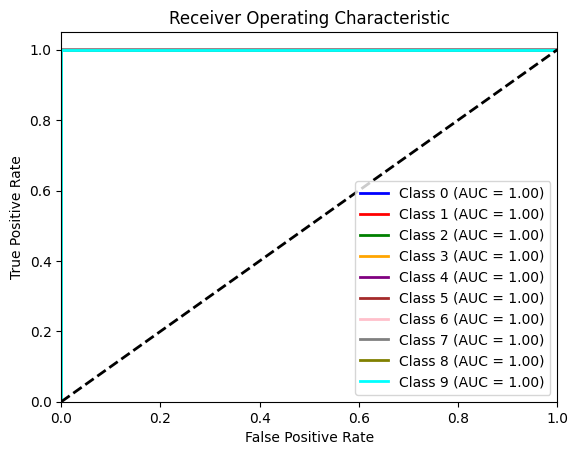

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Compute the AUC and ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_true))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

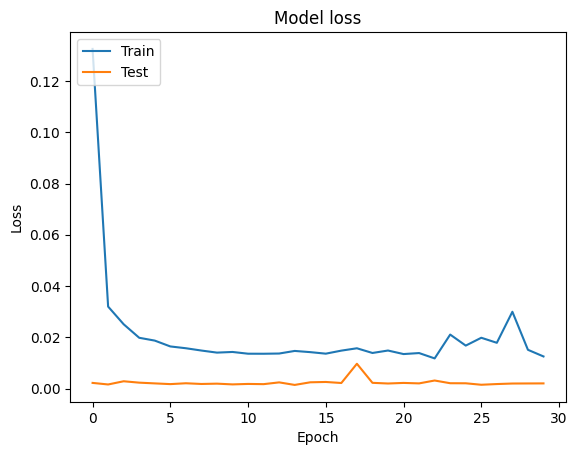

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# ... (Rest of your code)